In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt

## Loading Food Safety Data

In [4]:
filename = 'data.zip'
my_zip = zipfile.ZipFile(filename)
list_names = my_zip.namelist()
list_names

['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']

In [10]:
bus = pd.read_csv('data/businesses.csv',encoding = 'ISO-8859-1')
ins = pd.read_csv('data/inspections.csv')
vio = pd.read_csv('data/violations.csv')

## Examining the Business Data

In [12]:
# is each business id unique?
bus['business_id'].is_unique

True

What does each record represent?

Each record represents all the information about a single restaurant. Each row is equivalent to one restaurant. 

What is the primary key?

The primary key is the business_id column since even if two restaurants shared other information (like address) they would still have unique business-id's.

## Zip Codes

In [20]:
# counts for resturants in each zipcode
zip_counts = bus['postal_code'].value_counts()
zip_counts.head()

94110    596
94103    552
94102    462
94107    460
94133    426
Name: postal_code, dtype: int64

In [23]:
# check if all data is accounted for
print('zip_counts describes', sum(zip_counts), 'records.')
print('The original data have', len(bus), 'records')
print('Missing', len(bus)-sum(zip_counts),'records')

zip_counts describes 6166 records.
The original data have 6406 records
Missing 240 records


Missing zip codes aren't our only problem. There are also some records where the postal code is wrong, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

In [25]:
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


In [26]:
bus[bus['postal_code'].isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1702,8202,XIAO LOONG,250 WEST PORTAL AVENUE,San Francisco,CA,NaN,37.738616,-122.468775,+14152792647,NaN
1725,9358,EDGEWOOD CHILDREN'S CENTER,1801 VICENTE ST,San Francisco,CA,NaN,37.739083,-122.485437,NaN,NaN
1731,9582,DIMPLES,1700 POST ST.,San Francisco,CA,NaN,37.785632,-122.429794,+14155190341,NaN
1747,10011,OSHA THAI NOODLE,819 VALENCIA ST.,San Francisco,CA,NaN,37.759943,-122.421332,+14153109293,NaN
1754,10227,THE NAPPER TANDY,3200 24TH ST,San Francisco,CA,NaN,37.752581,-122.416482,+14155507510,NaN
...,...,...,...,...,...,...,...,...,...,...
6194,92563,LA BOULANGERIE DE SAN FRANCISCO,655 MONTGOMERY ST,San Francisco,CA,NaN,NaN,NaN,+14158239635,NaN
6223,92857,"MOBI MUNCH, INC.",OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14152899800,NaN
6240,93029,BAHN MI ZON,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14152414342,NaN
6354,94123,BON APPETIT @ AIRBNB,999 BRANNAN ST,San Francisco,CA,NaN,NaN,NaN,+1415 Alieri,NaN


Many of the records with NaN in the postal_code column also have an address listed as "OFF THE GRID". At first I thought this was some bougie San Fransisco thing where the restaurants are meant to remain secret so only the most 'worthy' know where they are. But I did some research and discovered https://offthegrid.com/ which is a collection of mobile food vendors. Now it makes sense as to why many of these records are without not only postal_code but also city, state, and phone number. Since they are mobile they are not necessarily limited to any one location. Additionally, it did not cross my mind that food trucks would have health and safety inspections, but in thinkning about it, surely they should.


In [27]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

In [29]:
weird_zip_code_businesses = bus[~bus['postal_code_5'].isin(all_sf_zip_codes)]
weird_zip_code_businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
1702,8202,XIAO LOONG,250 WEST PORTAL AVENUE,San Francisco,CA,NaN,37.738616,-122.468775,+14152792647,NaN
1725,9358,EDGEWOOD CHILDREN'S CENTER,1801 VICENTE ST,San Francisco,CA,NaN,37.739083,-122.485437,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6223,92857,"MOBI MUNCH, INC.",OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14152899800,NaN
6240,93029,BAHN MI ZON,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14152414342,NaN
6300,93484,CARDONA'S FOOD TRUCK,2430 WHIPPLE RD,San Francisco,CA,94544,NaN,NaN,+14153365990,94544
6354,94123,BON APPETIT @ AIRBNB,999 BRANNAN ST,San Francisco,CA,NaN,NaN,NaN,+1415 Alieri,NaN


We can look at each of these individually and notice a few things.

1. It looks as though there may have been a number of data entry erros, where singular digits are different than the zip codes found on the actual sites associated with the business
2. Sometimes the company operates in San Fransisco but is actually headquartered outside of the city so they will be disregarded.

In [30]:
# keeping only the good data
bus = bus[bus['postal_code_5'].isin(all_sf_zip_codes)]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


## Sampling from Business Data

In [33]:
def sample(series, n):
    return np.random.choice(series,n,replace=False).tolist()

In [36]:
#gather stratified random sample of business names, stratum is postal code
rest_name_list = ([(sample(bus[bus['postal_code_5']==str(code)]['name'],1)) for code in all_sf_zip_codes
                   if code in bus['postal_code_5'].value_counts()])
bus_strat_sample = pd.Series(rest[0] for rest in rest_name_list)
bus_strat_sample.head()

0                                  TUONG PHONG MARKET
1                          GOODY GOODIE CREAM & SUGAR
2    LOEWS REGENCY SAN FRANCISCO (EMPLOYEE CAFETERIA)
3                                NEW MINGS RESTAURANT
4                                            BUENA FE
dtype: object

In [38]:
#gather cluster sample of business ID, cluster is postal code,
#5 cluster per sample
good_codes = [code for code in all_sf_zip_codes if code in bus['postal_code_5'].value_counts()]
post_codes = sample(good_codes, 5)
bus_cluster_sample = bus[bus['postal_code_5'].isin(post_codes)]['business_id']
bus_cluster_sample.head()

1     24
3     45
4     48
9     66
10    67
Name: business_id, dtype: int64

Compare the strengths and weaknesses of cluster and stratified sampling:

Stratified sampling allows us to poll over every single zip code in the city (for which we have a restaurant), which allows us to form a fuller picture of the city as a whole, however by only taking a SRS of n=1 within each zipcode we do not really achieve that because it puts the full weight of a zipcode on a single restaurant. Cluster sampling allows us to (in theory) get a good representation for any 5 zip codes (in this case) because it takes every restaurant from a randomly chosen zip code for comparison. However this sample is similarly problematic when we get a zip code with few restaurants or if we get a zip code which is in San Fransisco but for which we have no restaurant data (a problem which I chose to omit by further reducing the size of `all_sf_zip_codes`)

In [39]:
#multi-stage sample, SRS of 5 postal codes, then SRS of 1 business name per code
good_codes = [code for code in all_sf_zip_codes if code in bus['postal_code_5'].value_counts()]
post_codes = sample(good_codes, 5)
rest_name_list = ([(sample(bus[bus['postal_code_5']==str(code)]['name'],1)) for code in post_codes
                   if code in bus['postal_code_5'].value_counts()])
bus_multi_sample = pd.Series(rest[0] for rest in rest_name_list)
bus_multi_sample.head()

0           ELEPHANT SUSHI 2
1                LA TORTILLA
2           NEW TARAVAL CAFE
3    ANN'S DONUT COFFEE SHOP
4                TEN REN TEA
dtype: object

## Latitude and Longitude

In [40]:
#missing longitude?
num_missing_longs = len(bus[bus['longitude'].isnull()])
num_missing_longs

2941

In [41]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
                "94109", "94110", "94111", "94112", "94114", "94115",
                "94116", "94117", "94118", "94121", "94122", "94123", 
                "94124", "94127", "94131", "94132", "94133", "94134"]

In [42]:
num_missing_in_each_zip = bus['postal_code_5'][bus['longitude'].isnull()][bus['postal_code_5'].isin(sf_dense_zip)].value_counts()
num_missing_in_each_zip.head()

94110    294
94103    285
94107    275
94102    221
94109    171
Name: postal_code_5, dtype: int64

Examining the proportion of null longitudes 

In [43]:
def div(x,y):
    return x/y

count_non_null = bus['postal_code_5'][~bus['longitude'].isnull()][bus['postal_code_5'].isin(sf_dense_zip)].value_counts()
fraction_missing_df = pd.concat([count_non_null.rename('count non null'),num_missing_in_each_zip.rename('count null')],axis=1,sort=False,)
fraction_missing_df['fraction null'] = fraction_missing_df['count null'] / (fraction_missing_df['count null'] + fraction_missing_df['count non null'])
fraction_missing_df.sort_values(by=['fraction null'], ascending = False, inplace= True)
fraction_missing_df.index.name = 'postal_code_5'
fraction_missing_df.head(100)

,count non null,count null,fraction null
postal_code_5,,,
94124,73,118,0.617801
94107,185,275,0.597826
94104,60,79,0.568345
94105,105,127,0.547414
94132,62,71,0.533835
94103,268,285,0.515371
94114,112,111,0.497758
94110,303,294,0.492462
94122,141,132,0.483516


## Investigate the Inspection Data

examine the types of inspection

In [44]:
ins.dtypes
ins.type.value_counts()

routine      14221
complaint        1
Name: type, dtype: int64

In [48]:
# fix date column / add year
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins['year'] = ins['new_date'].dt.year
ins.year.value_counts()

2016    5443
2017    5166
2015    3305
2018     308
Name: year, dtype: int64

## Explore Inspection Scores

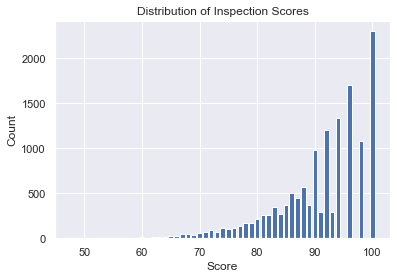

In [49]:
scores_table = x=ins['score'].value_counts(ascending=True)
ax = plt.bar(x=scores_table.index, height = scores_table.values)
plt.title('Distribution of Inspection Scores')
plt.xlabel('Score')
plt.ylabel('Count');
plt.show()

The scores are heavily focused in the 90 and above range with 64.7% of the data falling in that range. The distribution also has a very long left tail; the lowest value is 48, and the range of 48 to 72 comprises only 4.14% of the data. There is a pretty strong trend upwards for this data, there are some upper 90s values we never see: 99, 97, 95 as well as 50 and 51 but since there are so few points in lower ranges, it seems more possible to have missed those points. However statistically, of the 9000+ points in the 90s to not have a single of 99, 97, or 95 seems strange.

I do not know the standards for rating restaurants, but it does strike me as very odd that so many of these maintain scores higher than 90 and that the frequency of scores falls of exponentially. It could be that restaurants receiving low scores are driven out be a controlling market, but it seems more likely to me that the rating system itself is prone to bias and that these scores may not represent the quality of the restaurant as a whole.


In [50]:
print(sum(ins['score'][ins['score']>89].value_counts())/sum(ins['score'].value_counts()))
print((sum(ins['score'][ins['score']>47].value_counts())-sum(ins['score'][ins['score']>73].value_counts()))/sum(ins['score'].value_counts()))
for val in range(49,101):
    if val not in ins.score.value_counts().index:
        print(val)

0.6470257347771059
0.04141470960483758
49
50
51
95
97
99


what are the resturants with the worst scores?

In [51]:
ins_named = pd.merge(ins,bus[['business_id','name','address']],how='left',on='business_id')
ins_named.sort_values(by=['score']).head()

,business_id,score,date,type,new_date,year,name,address
13179,86647,48,20160907,routine,2016-09-07,2016,DA CAFE,407 CLEMENT ST
9476,71373,52,20161031,routine,2016-10-31,2016,GOLDEN RIVER RESTAURANT,5827 GEARY BLVD
8885,69199,53,20170127,routine,2017-01-27,2017,MEHFIL INDIAN RESTAURANT,28 02ND ST
7104,61436,54,20150706,routine,2015-07-06,2015,OZONE THAI RESTAURANT AND LOUNGE,598 02ND ST
2192,3459,54,20150407,routine,2015-04-07,2015,BASIL THAI RESTAURANT & BAR,1175 FOLSOM ST


## Restaurant Ratings Over Time

which restaurant has improved the most? (min 3 ratings)

In [52]:
id_more_3 = ins_named.business_id.value_counts().loc[lambda x: x>= 3].index
ins_named_filtered = ins_named[ins_named['business_id'].isin(id_more_3)][['business_id', 'score']]
ins_named_filtered[ins_named_filtered['business_id'] == 24]['score'].values
list_scores = {bus_id:ins_named_filtered[ins_named_filtered['business_id'] == bus_id]['score'].values for bus_id in id_more_3}
diffs = {}
for bus_id in list_scores:
    diffs[bus_id] = max(list_scores[bus_id])-min(list_scores[bus_id])
max_swing = ins_named[ins_named['business_id']==max(diffs,key=diffs.get)].name.values[1]
max_swing

"JOANIE'S DINER INC."

How many times has each restaurant been investigated?

In [53]:
ins_grouped = ins.groupby(['business_id','year'])
inspections_by_id_and_year =  ins_grouped[['business_id','year']].head().groupby(['business_id','year']).sum()
inspections_by_id_and_year['count'] = ins_grouped.size().values
inspections_by_id_and_year.head()

count
business_id year       
19          2016      1
            2017      1
24          2016      2
            2017      1
31          2015      1

How frequently are business investigated multiple times per year?

In [55]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

let's compare the distributions of those resturants which are investigated multiple times per year, seeing their first score compared to their second score.

In [56]:
review_2016 = ins[ins.year == 2016].sort_values(by='new_date').groupby(['business_id']).agg(list)
review_2016 = review_2016[review_2016['score'].map(len) == 2]
scores_pairs_by_business = pd.DataFrame(review_2016.score.values,review_2016.index).rename(columns = {0:'score_pair'})
ins2016 = ins[ins['year'] == 2016]

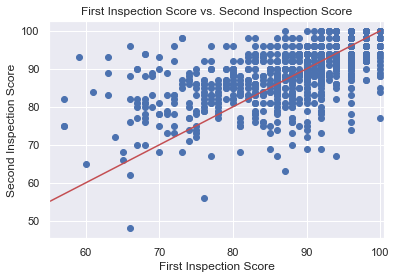

In [57]:
x= np.array([dat[0] for dat in scores_pairs_by_business.score_pair.values])
y=np.array([dat[1] for dat in scores_pairs_by_business.score_pair.values])
plt.scatter(x=x,y=y)
plt.plot([50,100],[50,100],c='r')
plt.title('First Inspection Score vs. Second Inspection Score')
plt.xlabel('First Inspection Score')
plt.ylabel('Second Inspection Score')
plt.xlim([55,100.5]);
plt.show()

That doesn't show too much, we can also see the distribution in ranges in another way.

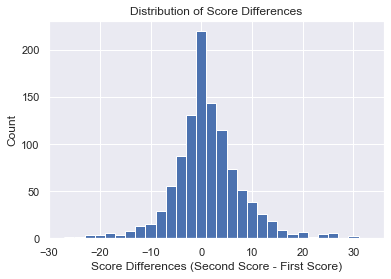

In [58]:
diff = y-x
plt.hist(diff,bins=list(range(min(diff),max(diff),2)))
plt.title('Distribution of Score Differences')
plt.xlabel('Score Differences (Second Score - First Score)')
plt.ylabel('Count');
plt.show()